# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, scale, minmax_scale, MinMaxScaler
from scipy.stats import ttest_ind

from scipy import stats 
import math

sns.set_style("whitegrid")

# Data import

In [2]:
### for google colab 
# from google.colab import files
# uploaded = files.upload() 

In [3]:
filepath = 'bank-additional-full.csv'
df = pd.read_csv(filepath, sep=';') 

# Dataset description

The report is based on Bank Marketing Data Set which has been obtained from UC Irvine Machine Learning repository. Per the description included on UCI website, data derives from direct marketing campaigns of banking institution from Portugal. The campaign was based on phone calls, where the time deposit was offered to the client.
The dataset consist of 20 input variables, including:
*	Bank client data, such as age, job, marital status of the client
*	Data based on the last contact, such as communication type, duration of the phone call and day of the week.
*	Social and economic context attributes, such as employment variation rate or monthly consumer price index,
*	Other attributes, not related directly to current marketing campaign, such as number of contacts performed for specific client, or previous marketing campaign outcome

The target variable was the response from the client, namely whether the client subscribed for the term deposit or not.


In [4]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data exploration & visualization 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
all_coulumns = df.columns.to_list()

In [7]:
int_columns = df.select_dtypes('int64').columns.to_list()
float_columns = df.select_dtypes('float64').columns.to_list()
cat_columns = df.drop(columns='y').select_dtypes('object').columns.to_list()

In [8]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41188.0,258.29,259.28,0.00,102.00,180.00,319.00,4918.00
campaign,41188.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41188.0,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.0,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41188.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.0,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.0,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41188.0,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41188.0,5167.04,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


In [9]:
df.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [10]:
y_dict = {
    'yes': 1,
    'no':  0,
    }
df['y'] = df['y'].map(y_dict)

In [11]:
df[df['y'] == 1].groupby('y').agg(['mean', 'median']).T

y                                1
age            mean      40.913147
               median    37.000000
duration       mean     553.191164
               median   449.000000
campaign       mean       2.051724
               median     2.000000
pdays          mean     792.035560
               median   999.000000
previous       mean       0.492672
               median     0.000000
emp.var.rate   mean      -1.233448
               median    -1.800000
cons.price.idx mean      93.354386
               median    93.200000
cons.conf.idx  mean     -39.789784
               median   -40.400000
euribor3m      mean       2.123135
               median     1.266000
nr.employed    mean    5095.115991
               median  5099.100000

Looking at the distribution of target variable, roughly 10% of clients
called during the marketing campaign subscribed for term deposit.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


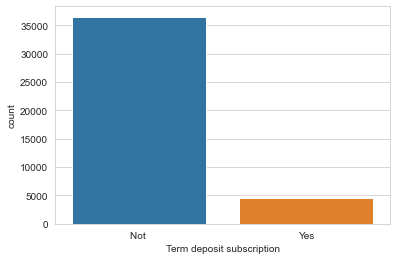

In [12]:
y_plot = sns.countplot(df['y'])
y_plot.set_xlabel('Term deposit subscription')
y_plot.set_xticklabels(['Not ','Yes'])
plt.show()

Below histogram and boxplot are showing distribution of age including split
between clients that accepted term deposit and the clients that refused it.
The offer has been accepted mainly between clients at the age of 30 and 50,
but although slightly wider range, it seems like there is no significant
difference comparing to clients that refused subscription.

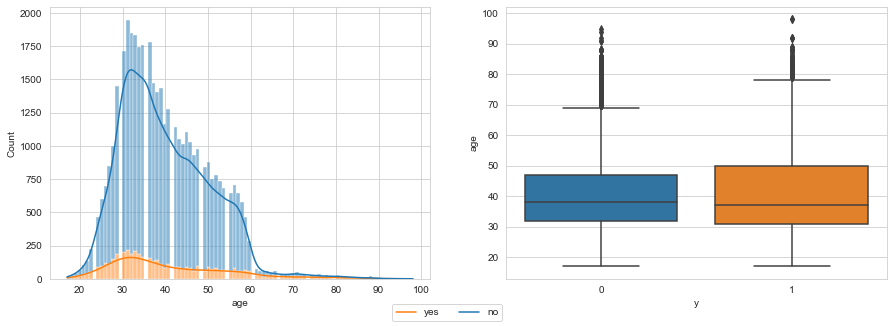

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) #sharey=True)

sns.histplot(data=df, x='age', hue='y', multiple='stack',
             stat='count', ax=ax[0], legend=False, kde=True)
sns.boxplot(data=df, y='age', x='y', ax=ax[1])
    
fig.legend(['yes', 'no'], loc = 'lower center', ncol=2)

plt.show()

From below plot we can see employment variation rate split per target variable

<AxesSubplot:xlabel='emp.var.rate', ylabel='Percent'>

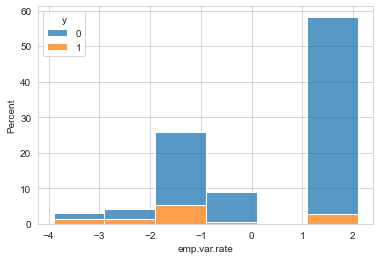

In [14]:
sns.histplot(df, x='emp.var.rate', hue='y', multiple='stack', stat='percent', discrete=True)

Then, on the below scatter plots we can see:

1. Duration versus age per target variable

<AxesSubplot:xlabel='duration', ylabel='age'>

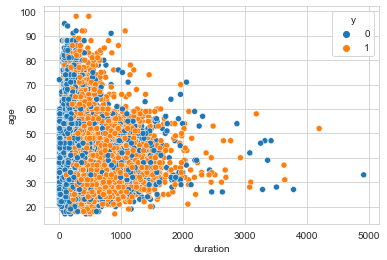

In [15]:
sns.scatterplot(data=df, x='duration', y='age', hue='y')

2. Number of contacts during current campaign vs age per target variable

<AxesSubplot:xlabel='campaign', ylabel='age'>

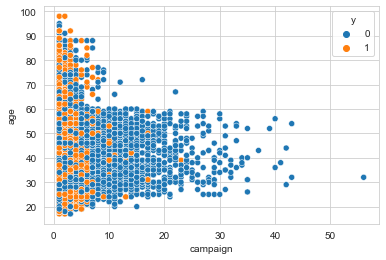

In [16]:
sns.scatterplot(data=df, x='campaign', y='age', hue='y')

Here, we can observe a number of contacts in previous campaign(s) split per target variable

<AxesSubplot:xlabel='previous', ylabel='Count'>

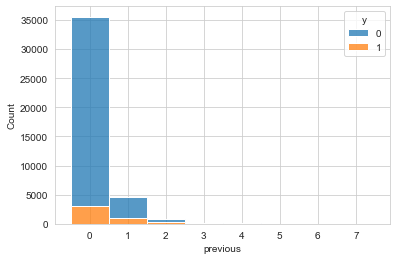

In [17]:
sns.histplot(data=df, x='previous', hue='y', multiple='stack', discrete=True)

Then, the clients' job split per target variable

<AxesSubplot:xlabel='Count', ylabel='job'>

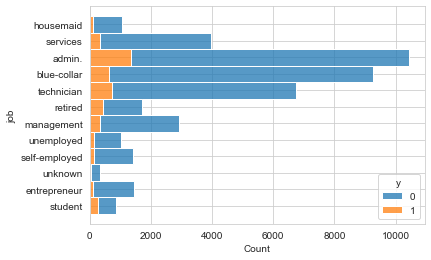

In [18]:
sns.histplot(data=df, y='job', hue='y', multiple='stack')

And their marital status versus age, split per target variable

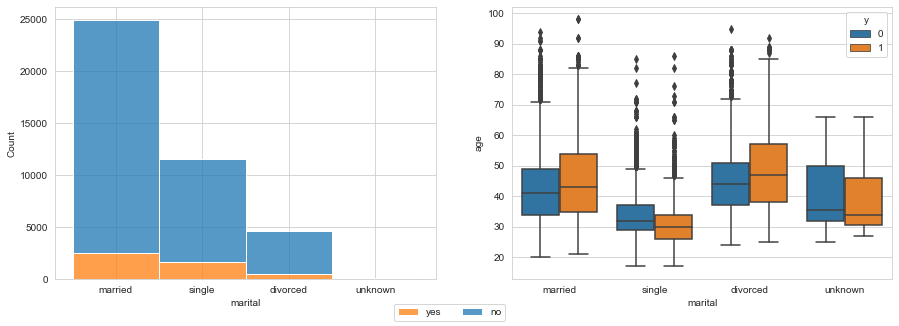

In [19]:
#sns.histplot(data=df, y='marital', hue='y', multiple='stack')

fig, ax = plt.subplots(1, 2, figsize=(15, 5)) #sharey=True)

sns.histplot(data=df, x='marital', hue='y', ax=ax[0], multiple='stack', legend=False)
sns.boxplot(data=df, y='age', x='marital', hue='y', ax=ax[1])
    
fig.legend(['yes', 'no'], loc = 'lower center', ncol=2)

plt.show()

Also, clients' education split per target variable

<AxesSubplot:xlabel='Count', ylabel='education'>

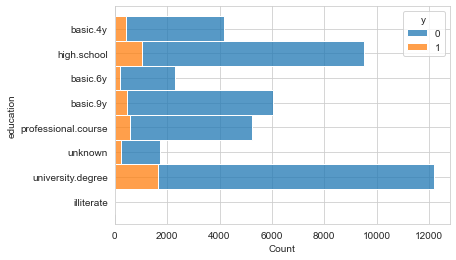

In [20]:
sns.histplot(data=df, y='education', hue='y', multiple='stack')

It seems like there are some variances observed between days of the
week, when the phone call was performed. Monday is possibly less effective
in terms of acceptance of the subscription, comparing to Tuesday. 10% out
of the total offers made on Monday versus nearly 12% in Tuesday.

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

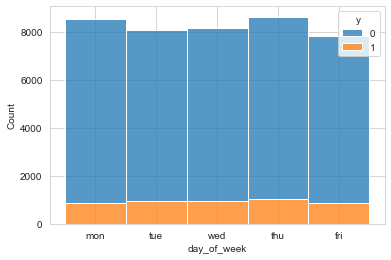

In [21]:
sns.histplot(data=df, x='day_of_week', hue='y', multiple='stack')

Below histogram, shows the month when the client was contacted with split per target variable

<AxesSubplot:xlabel='month', ylabel='Count'>

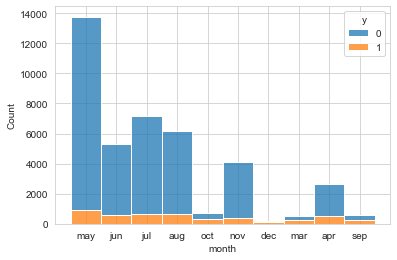

In [22]:
sns.histplot(data=df, x='month', hue='y', multiple='stack')

Based on outcome of previous marketing campaign, excluding observations
with no prior interaction, it seems like nearly two-third of clients with
successful outcome in the past, decided to subscribe for current term
deposit offer. This could either indicate that some specific clients are
more likely to accept marketing offers or they have been satisfied with the
previous offer.

<AxesSubplot:xlabel='Count', ylabel='poutcome'>

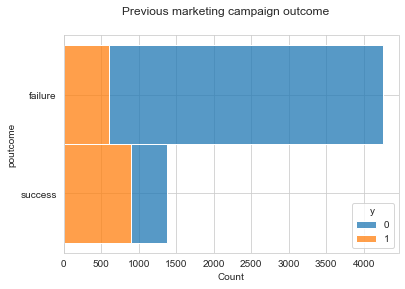

In [23]:
fig, ax = plt.subplots()
fig.suptitle('Previous marketing campaign outcome')
sns.histplot(data=df.loc[df['poutcome'] != 'nonexistent'], y='poutcome', hue='y', multiple='stack')

Below we can see *Pairplot* generated for selected numeric variables

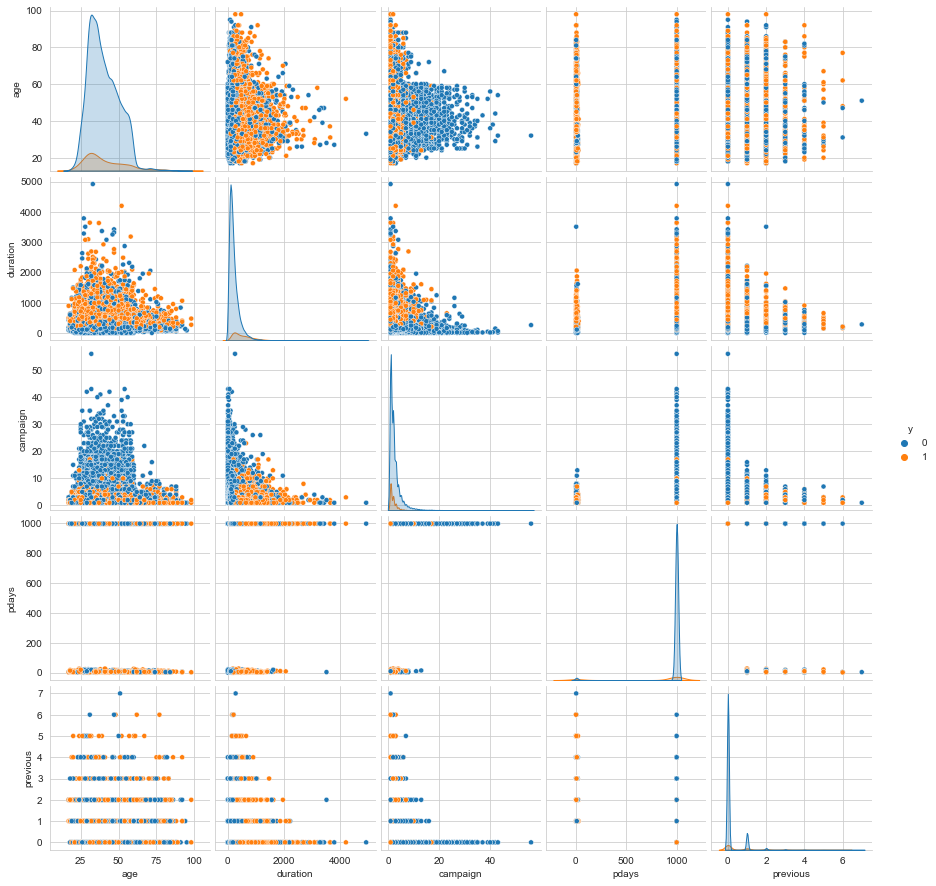

In [24]:
sns.pairplot(df, x_vars=int_columns, y_vars=int_columns, hue='y', 
             plot_kws={'s': 25}
             )
plt.show()

When it comes to the correlation between numeric features, there is no
significant dependency between client-specific features such as age and
duration, however high correlation was observed between some of social and
economic context attributes, probably due to their individual correlation
to the time series..

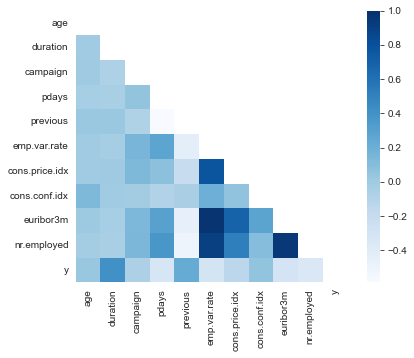

In [25]:
corr_mat = df.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_mat, cmap='Blues', mask=mask, vmax=1, square=True)

# Feature engineering & transformation

Based on the data set, it has been identified that there are no blank
values in data set, hence no approach to handle missing data were required.
As the dataset includes a number of categorical values as well as numeric,
various feature transformations were required, in case of further
predictive modeling. To perform this, variables were split into individual
groups then encoding and scaling applied: One Hot Encoding approach for
categorical values, and Min-Max-Scaling for numeric values.

## One-hot encoding

In [26]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df, columns=cat_columns, drop_first=True)
df_ohe

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


## Scaling

In [27]:
mms = MinMaxScaler()
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[int_columns] = scaler.fit_transform(df_scaled[int_columns])
df_scaled[int_columns]

,age,duration,campaign,pdays,previous
0,1.533034,0.010471,-0.565922,0.195414,-0.349494
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494
4,1.533034,0.187888,-0.565922,0.195414,-0.349494
...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494


<AxesSubplot:>

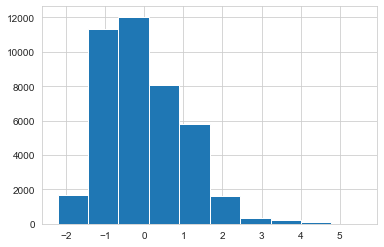

In [28]:
df_scaled['age'].hist()

<AxesSubplot:>

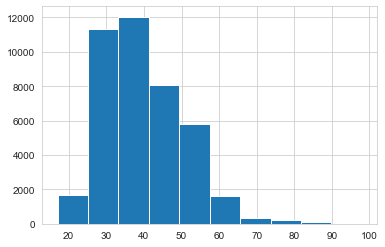

In [29]:
df['age'].hist()

# Hypothesis testing

Based on the performed exploratory data analysis, below hypothesis have been formulated:
* Hypothesis number one: Mean age of clients that accepted the offer is
significantly different to mean age of clients that refused to
subscribe for term deposit.
* Hypothesis number two: The success in the previous campaign had
significant impact on the term deposit subscription
* Hypothesis number three: Tuesday is more efficient day to perform the
call than Monday.

In [30]:
df_mon_tue = df[(df['day_of_week'] == 'mon') | (df['day_of_week'] == 'tue')]
df_mon_tue

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,1
41161,33,admin.,married,university.degree,no,yes,no,cellular,nov,tue,...,1,999,1,failure,-1.1,94.767,-50.8,1.035,4963.6,0
41162,60,blue-collar,married,basic.4y,no,yes,no,cellular,nov,tue,...,2,4,1,success,-1.1,94.767,-50.8,1.035,4963.6,0
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,1


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

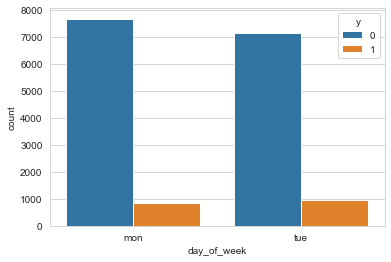

In [31]:
sns.countplot(data=df_mon_tue, x='day_of_week', hue='y')

In [32]:
df_mon_tue.groupby('day_of_week')['y'].value_counts(normalize=True)

day_of_week  y
mon          0    0.900517
             1    0.099483
tue          0    0.882200
             1    0.117800
Name: y, dtype: float64

<AxesSubplot:xlabel='y', ylabel='age'>

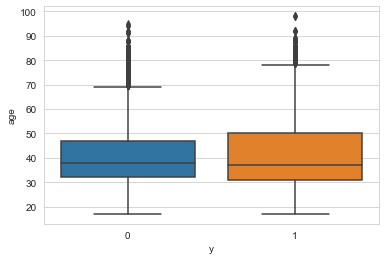

In [33]:
sns.boxplot(data=df, y='age', x='y')

## Formal significance test

It has been decided to test the first hypothesis.

**Null hypothesis:** The means of age distribution underlying the samples are
equal

**Alternative hypothesis:** The means of age distribution underlying the
samples are unequal

For the purpose of testing, T-test have been applied, to check significancy
of the means of the above two independent samples. The chosen threshold for
the p-value was 0.05

Text(0.5, 0.98, 'Term deposit subscription')

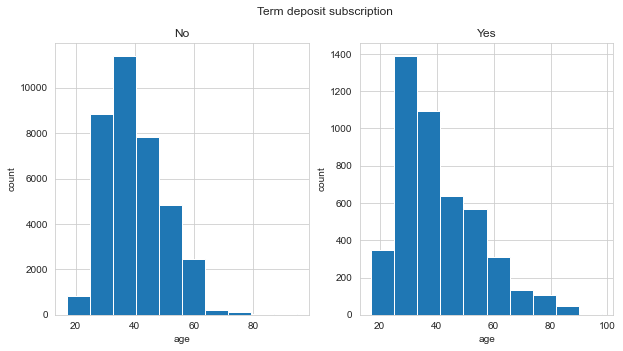

In [34]:
fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(10, 5))

df['age'][df['y'] == 0].hist(ax=ax_0)
df['age'][df['y'] == 1].hist(ax=ax_1)

ax_0.set(title='No', ylabel='count', xlabel='age')
ax_1.set(title='Yes', ylabel='count', xlabel='age')
fig.suptitle('Term deposit subscription')

Based on results of the p-value, being the probability of observing as or
more extreme values assuming the null hypothesis, and the chosen threshold
it has been decided to reject the null hypothesis.

In [35]:
ttest = ttest_ind(df['age'][df['y'] == 0], df['age'][df['y'] == 1])
ttest

Ttest_indResult(statistic=-6.172087109640128, pvalue=6.80213641846347e-10)

# Next steps

One of the next steps to be considered is to develop a model, which would
allow to predict the target variable. There are a number of algorithms that
can be used for training to develop suitable model and based on the nature
of the target variable, a binary classification algorithms, including a
handful of various strategies to handle imbalanced data set would be
suitable. Also, it is also recommended to explore impact of the variables
mentioned on the remaining hypothesis formulated.

Given no missing values, and the volume of the observations, the overall
quality of the data should be sufficient for predictive modeling, and
request for additional data is not necessary

# References

Dataset:

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Course training materials:

https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning